In [8]:
from utils import loadDataset,loadTestDataset
from sklearn.model_selection import train_test_split
from keras.applications.mobilenet import preprocess_input
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np
import cv2
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from Model import buildModel
from math import sqrt



In [2]:
from config import CLASSES,mapping


In [3]:
def plotConfusionMatrix(mat):

    # Normalise
    normalized_mat = mat.astype('float') /mat.sum(axis=1)[:, np.newaxis]


    df_cm = pd.DataFrame(mat,index=CLASSES,columns=CLASSES)
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=0.8)  # for label size
    sn.heatmap(df_cm, annot=True,fmt='d', cbar=False)  # font size

    plt.show()


def load_image(img_path,expand_dim=False ):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    if(expand_dim):
        img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

In [5]:

def evaluateOnDataFrame(model,df):
    predictions = [];
    img_paths = list(df.loc[:, 'filename'])
    truth=list(df.loc[:,'label'])
    i=0;
    print(df['label'].value_counts())
    for path in img_paths:
        x = load_image(path,expand_dim=True)
        truth[i]=mapping[truth[i]]
        p=model.predict(x)
        p=np.argmax(p)
        predictions.append(p)
        i=i+1;

    accuracy = accuracy_score(truth,predictions)
    confusion_mat=confusion_matrix(truth,predictions)
    precsion, recall, f1_ccore, _ = precision_recall_fscore_support(truth, predictions)
    print("Accuracy :",accuracy)
    print("Precision :", precsion)
    print("Recall :", recall)
    print("f1 :", f1_ccore)
    print(confusion_mat)
    plotConfusionMatrix(confusion_mat)


In [5]:
#on load model 
model = buildModel(len(CLASSES))
weights_path='/home/ai/Desktop/Python Projects/Vessel_Classification/snapshots2/cp-0010_best_loss.hdf5'
model.load_weights(weights_path)
# path = "/home/ai/Desktop/Python Projects/Marrine_Vessel_Detection/Dataset/videos/videos 2/videos 2/Richardson_Bay/IMG_4301.MOV"
# inferenceVideo(model,video_path=path)


Passenger ship     549
Military ship      502
Container ship     359
Tanker             250
Tug                146
Fishing vessels     99
Sailing vessel      90
Name: label, dtype: int64
Accuracy : 0.8511278195488722
Precision : [0.7912844  0.76470588 0.92993631 0.95900178 1.         0.65753425
 0.75714286]
Recall : [0.96100279 0.52525253 0.87250996 0.97996357 0.3        0.768
 0.7260274 ]
f1 : [0.86792453 0.62275449 0.90030832 0.96936937 0.46153846 0.70848708
 0.74125874]
[[345   0   0   1   0  13   0]
 [  6  52   3   8   0  24   6]
 [ 12   4 438   3   0  36   9]
 [  4   3   0 538   0   3   1]
 [  8   5  26   5  27   4  15]
 [ 45   4   2   4   0 192   3]
 [ 16   0   2   2   0  20 106]]


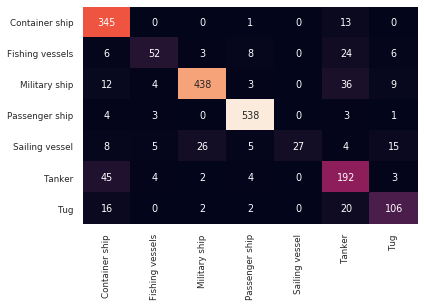

In [9]:
df=loadDataset()
train, val = train_test_split(df, test_size=0.20, random_state=42)
evaluateOnDataFrame(model,val)

Military ship      300
Passenger ship     300
Tanker              50
Container ship      50
Tug                 40
Sailing vessel      39
Fishing vessels     30
Name: label, dtype: int64

Accuracy : 0.8763906056860321
Precision : [0.64102564 0.68181818 0.96797153 0.98634812 1.         0.5
 0.71111111]
Recall : [1.         0.5        0.90666667 0.96333333 0.30769231 0.78
 0.8       ]
f1 : [0.78125    0.57692308 0.9363167  0.97470489 0.47058824 0.609375
 0.75294118]
[[ 50   0   0   0   0   0   0]
 [  2  15   0   0   0  10   3]
 [  5   3 272   2   0  15   3]
 [  4   0   1 289   0   6   0]
 [  4   4   7   1  12   4   7]
 [ 11   0   0   0   0  39   0]
 [  2   0   1   1   0   4  32]]


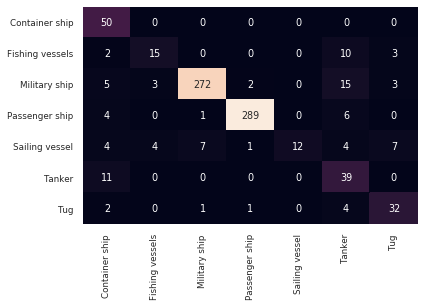

In [8]:
test_df=loadTestDataset()
evaluateOnDataFrame(model,test_df)

In [16]:
def inferenceImage(model,path):
    img = load_image(img_path=path,expand_dim=True)
    p=model.predict(img)
    predicted_class=CLASSES[np.argmax(p)]
  
    return predicted_class

In [20]:

def plot_images(images, cls_true, cls_pred=None):

    # Create figure with 3x3 sub-plots.
    count = len(images)
    fig, axes = plt.subplots(int(sqrt(count)), int(sqrt(count)))
#     fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i])

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()


def testRandom(model,df,count =16):
    idx=np.random.randint(0,df.shape[0],count)
    file_path_list=list(df.loc[idx,'filename'])
    true_labels =list(df.loc[idx,'label'])

    img_list =[];
    predicted_labels=[]
    for file_path in file_path_list:
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_list.append(img)
        prediction=inferenceImage(model,file_path)
        predicted_labels.append(prediction)


   
    plot_images(img_list,true_labels,predicted_labels)


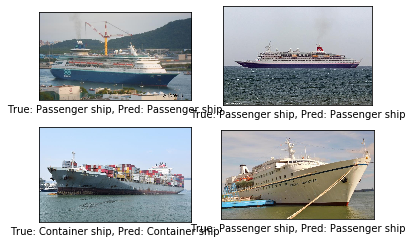

In [33]:
# Testing on random images 
df=loadTestDataset()
testRandom(model,df,4)